# Classification
Learn a classifier and check how well it can predict the category and subcategory a person in your dataset belongs to.

In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import nltk 
from nltk import word_tokenize 
from nltk.corpus import stopwords

from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score

from itertools import chain

from sklearn.metrics import confusion_matrix, classification_report

In [74]:
with open('data/data.csv', 'r') as f:
    df = pd.read_csv(f, index_col=0)
df.head()

,person,description,p_description,content,p_content,label_2,label_6
0,Kichka_Bodurova,Bulgarian pop-folk musician,"['bulgarian', 'popfolk', 'musician']","Big Brother: All-Stars, also known as Big Brot...","[['big', 'brother', 'allstars', 'also', 'known...",A,singer
1,Taras_Topolya,Ukrainian singer,"['ukrainian', 'singer']",EdCamp Ukraine (Ukrainian: ЕдКемп Україна) is ...,"[['edcamp', 'ukraine', 'ukrainian', 'едкемп', ...",A,singer
2,Louis_Graveure,"English actor and baritone singer known as ""Th...","['english', 'actor', 'baritone', 'singer', 'kn...",The Accusing Song (German: Ein Lied klagt an) ...,"[['accusing', 'song', 'german', 'ein', 'lied',...",A,singer
3,Philippe_Robrecht,Belgian guitarist and singer,"['belgian', 'guitarist', 'singer']",Jacques Romain Georges Brel (French: [ʒɑk ʁɔmɛ...,"[['jacques', 'romain', 'georges', 'brel', 'fre...",A,singer
4,Moira_Lambert,British singer,"['british', 'singer']",Mary Rose Byrne (born 24 July 1979) is an Aust...,"[['mary', 'rose', 'byrne', 'born', '24', 'july...",A,singer


In [75]:
'''# We print the different category names and labels. 
print(set(data['label'])) 
categories = pd.DataFrame(list(data['label']), columns=['label'])
display(categories) 
 
# Print to see the articles associated to given label values. 
df[df['label'] == 0].head() 
df[df['label'] == 1].head()
'''
df[df['label_6'] == 'singer'].head() 

,person,description,p_description,content,p_content,label_2,label_6
0,Kichka_Bodurova,Bulgarian pop-folk musician,"['bulgarian', 'popfolk', 'musician']","Big Brother: All-Stars, also known as Big Brot...","[['big', 'brother', 'allstars', 'also', 'known...",A,singer
1,Taras_Topolya,Ukrainian singer,"['ukrainian', 'singer']",EdCamp Ukraine (Ukrainian: ЕдКемп Україна) is ...,"[['edcamp', 'ukraine', 'ukrainian', 'едкемп', ...",A,singer
2,Louis_Graveure,"English actor and baritone singer known as ""Th...","['english', 'actor', 'baritone', 'singer', 'kn...",The Accusing Song (German: Ein Lied klagt an) ...,"[['accusing', 'song', 'german', 'ein', 'lied',...",A,singer
3,Philippe_Robrecht,Belgian guitarist and singer,"['belgian', 'guitarist', 'singer']",Jacques Romain Georges Brel (French: [ʒɑk ʁɔmɛ...,"[['jacques', 'romain', 'georges', 'brel', 'fre...",A,singer
4,Moira_Lambert,British singer,"['british', 'singer']",Mary Rose Byrne (born 24 July 1979) is an Aust...,"[['mary', 'rose', 'byrne', 'born', '24', 'july...",A,singer


In [76]:
y_2 = df.label_2
y_6 = df.label_6

eva = list(map(eval, df.p_description))
X_d = list(map(lambda x: ' '.join(x), eva))

eva = list(map(eval, df.p_content))
flattened_eva = list(map(lambda x: list(chain(*x)), eva))
X_c = list(map(lambda x: ' '.join(x), flattened_eva))

In [77]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_d,
                                                    y_6,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_6) 

In [78]:
# Using TFIDF vectorizer to convert convert words to Vector Space 
tfidf_vectorizer = TfidfVectorizer(max_features=8000,  
                                   use_idf=True,  
                                   stop_words='english',  
                                   tokenizer=nltk.word_tokenize, 
                                   #ngram_range=(1, 3)
                                   ) 
  
# Fit the vectorizer to train and test data 
X_train_tf = tfidf_vectorizer.fit_transform(X_train) 
X_test_tf = tfidf_vectorizer.transform(X_test) 
  
# Print the shape of the matrices X_train and X_test and the size of the vocabulary 
print(X_train_tf.shape) 
print(X_test_tf.shape) 
print( "Vocabulary size:", len(tfidf_vectorizer.vocabulary_) )

(126, 177)
(54, 177)
Vocabulary size: 177


In [79]:
features = tfidf_vectorizer.get_feature_names() 
print(features)  

['10', '10801138', '14501480', '15781631', '16271703', '18141879', '18481922', '18621934', '18621947', '1866c1944', '18771962', '18821938', '1887–1972', '18881966', '18891970', '18931955', '18931971', '18971972', '18971978', '1900', '19041984', '19182006', '19212019', '19242002', '19282018', '19302009', '19402007', '1982', '2', '45901', '81', 'academic', 'active', 'actor', 'actress', 'ad', 'american', 'andalusian', 'anerican', 'arab', 'archeologist', 'architect', 'armenian', 'artist', 'author', 'b1931', 'b1963', 'ballad', 'baritone', 'belgian', 'berkeley', 'born', 'brazilian', 'british', 'bulgarian', 'california', 'canadian', 'castaway', 'cbdb', 'computer', 'consul', 'contributing', 'critic', 'czech', 'czechoslovak', 'dartmouth', 'devon', 'died', 'director', 'discussion', 'dutch', 'dynasty', 'editor', 'el', 'emperor', 'england', 'english', 'era', 'family', 'farmer', 'father', 'fiction', 'figure', 'film', 'finnish', 'football', 'french', 'fusion', 'german', 'germanamerican', 'greco', 'g

In [80]:
# Create a Perceptron object 
clf = Perceptron(penalty='l1',  alpha=0.001, random_state=0) 
  
# Train the model on the training data 
clf.fit(X_train_tf, y_train) 

# Test the model on the test data 
predictions = clf.predict(X_test_tf) 
  

## Part 1
define a function which outputs accuracy, a confusion matrix, precision, recall and F1 for the results of your classification (when classifying into categories and when classifying into subcategories)

In [81]:
def compute_scores(expected, predicted):
    '''
    # Print out the expected values and the predictions 
    print('Expected Values:', list(expected)) 
    print('Predictions:', list(predicted)) 
    '''
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(expected, predicted)

    # print precision, recall, F1
    report = classification_report(predicted, expected)

    return conf_matrix, report

In [82]:
conf_matrix, report = compute_scores(expected=y_test, predicted=predictions)
print(conf_matrix, report)

[[8 0 0 1 0 0]
 [0 5 0 4 0 0]
 [1 0 6 2 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]                precision    recall  f1-score   support

    architect       0.89      0.89      0.89         9
mathematician       0.56      1.00      0.71         5
      painter       0.67      1.00      0.80         6
   politician       1.00      0.47      0.64        19
       singer       1.00      1.00      1.00         9
       writer       0.67      1.00      0.80         6

     accuracy                           0.80        54
    macro avg       0.80      0.89      0.81        54
 weighted avg       0.87      0.80      0.78        54



## Part 2
define a function which outputs a visualisation of the accuracy of your classifier per category and per subcategories

In [83]:
import seaborn as sns

report = pd.DataFrame(report)
report.head()

In [84]:
def plot_classification_report(cr):

    lines = cr.split('\n')
    classes = []
    plot_mat = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: (int(len(t))-1)]]
        plot_mat.append(v)

    avg = lines[-2].split()[2:]
    classes.append('macro avg')
    avg = [float(x) for x in avg[:-1 ]]
    plot_mat.append(avg)
    plot_mat = np.array(plot_mat)

    plt.imshow(plot_mat, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.title('Classification report')
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))

    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    #plt.tight_layout()

    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [96]:
def plot_confusion_matrix(conf_matrix):
    sns.set(font_scale=1)
    matrix = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=.5, cmap='flare')
    matrix.set(xlabel='predicted', ylabel='expected')

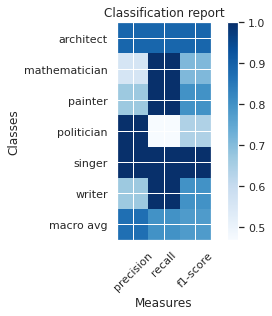

In [99]:
plot_classification_report(report)

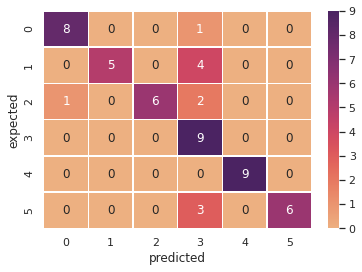

In [98]:
plot_confusion_matrix(conf_matrix)